In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from scipy.stats import norm

# Target Function

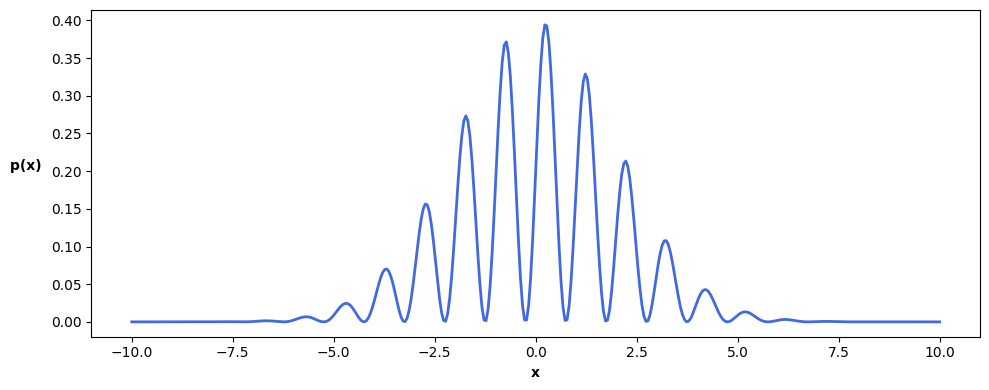

In [2]:
mu = 0
sigma = 2
omega = 2 * np.pi

def target(x, mu=0, sigma=2, omega=2*np.pi):
    p_x = np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 + np.sin(omega * x))
    p_x /= np.trapz(p_x, x)
    return p_x

x = np.linspace(-10, 10, 400)
p_x = target(x, mu, sigma, omega)

plt.figure(figsize=(10, 4))
plt.plot(x, p_x, linewidth=2, color='royalblue')
plt.xlabel('x', fontweight='heavy')
plt.ylabel('p(x)        ', rotation=0, fontweight='heavy')
plt.tight_layout()
# plt.savefig('Results/MCMC/Target Distribution.png', transparent=True, dpi=144)
plt.show()

# Independence MH

Set mu0 = 0 and tau0 = 2.

In [3]:
n = 10000
mu0 = 0
tau0 = 2

def target(x, mu=0, sigma=2, omega=2*np.pi):
    p_x = np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 + np.sin(omega * x))
    # p_x /= np.trapz(p_x, x)
    return p_x

y0 = np.random.uniform(0, 10)
x = []
x.append(y0)

accept_num = 0

for t in range(1, n):
    y = np.random.normal(mu0, tau0)
    q_y_given_x = norm.pdf(y, mu0, tau0)
    q_x_given_y = norm.pdf(x[t-1], mu0, tau0)
    log_alpha = min(0, np.log(target(y)) + np.log((q_x_given_y)) - np.log(target(x[t-1])) - np.log(q_y_given_x))

    u = np.random.uniform(0, 1)
    if np.log(u) <= log_alpha:
        x.append(y)
        accept_num += 1
    else:
        x.append(x[t-1])

accept_rate = accept_num / n

print('Acceptance rate:', accept_num, 'of', n, '=', str(accept_rate*100)+'%')

Acceptance rate: 5953 of 10000 = 59.53000000000001%


### Draw the Figure
1. The time series plots of $x_t$  
2. The ACF of $x_t$ (lags = 40)  
3. The histogram estimation of $x_1,\cdots,x_t$
4. The density estimation of $x_1,\cdots,x_t$

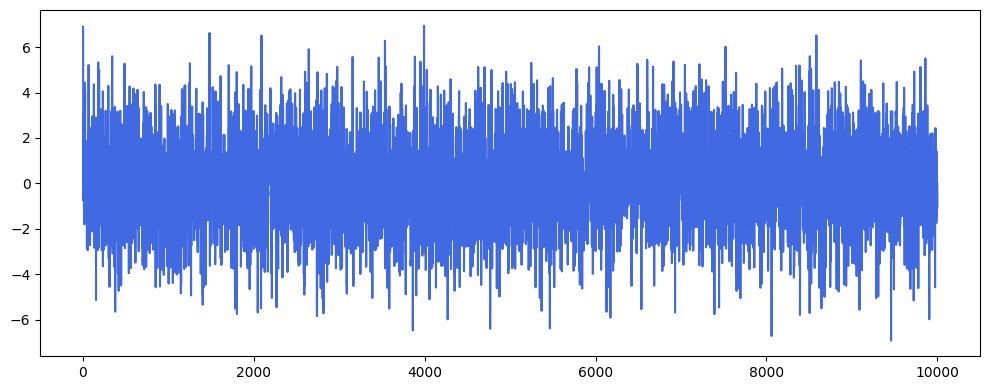

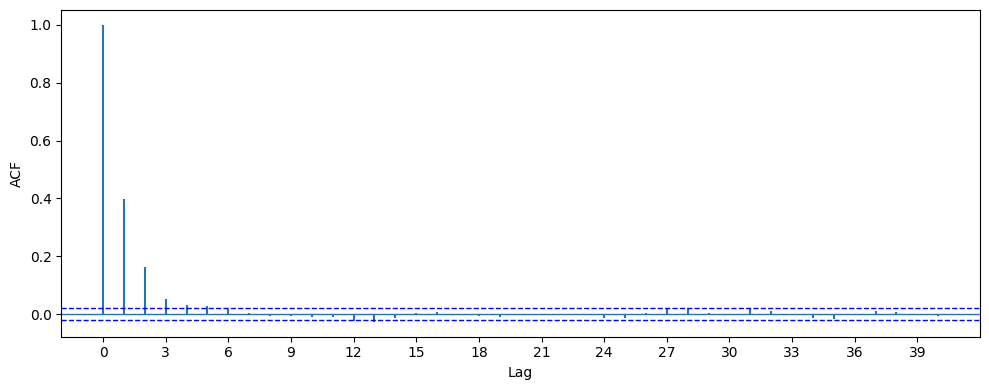

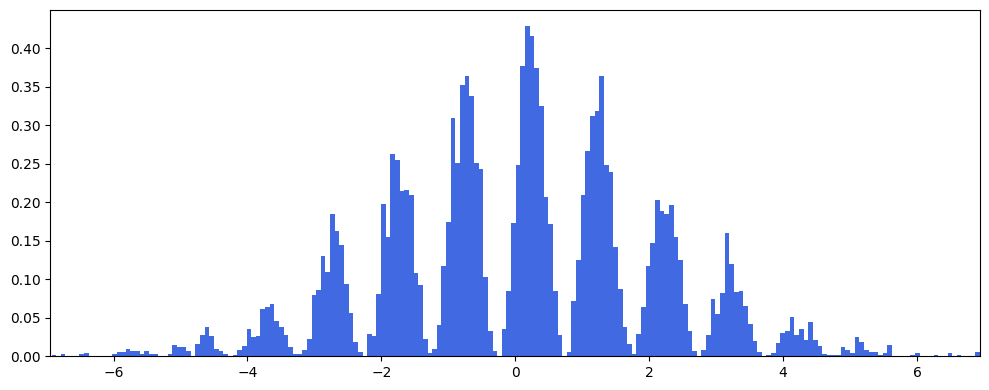

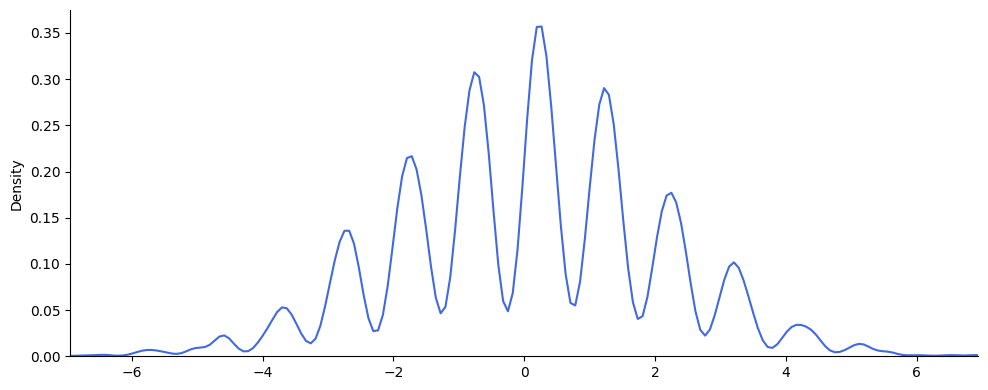

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(x, color='royalblue')
plt.tight_layout()
plt.show()

lags = 40
plt.figure(figsize=(10, 4))
acf_pacf_fig(x, both=False, lag = lags)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(x, bins=200,density=True, color='royalblue')
plt.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

g = sns.displot(x, kind='kde', bw_adjust=0.4, height=4, aspect=2.5, color='royalblue')
g.figure.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

### Robustness
For robustness, we set a bias mu and tau to test wheather independence MH can also fit.  
Here, we set mu0 = 3, tau0 = 4.

In [5]:
n = 10000
mu0 = 3
tau0 = 4

y0 = np.random.uniform(0, 10)
x = []
x.append(y0)

accept_num = 0

for t in range(1, n):
    y = np.random.normal(mu0, tau0)
    q_y_given_x = norm.pdf(y, mu0, tau0)
    q_x_given_y = norm.pdf(x[t-1], mu0, tau0)
    log_alpha = min(0, np.log(target(y)) + np.log((q_x_given_y)) - np.log(target(x[t-1])) - np.log(q_y_given_x))

    u = np.random.uniform(0, 1)
    if np.log(u) <= log_alpha:
        x.append(y)
        accept_num += 1
    else:
        x.append(x[t-1])

accept_rate = accept_num / n

print('Acceptance rate:', accept_num, 'of', n, '=', str(accept_rate*100)+'%')

Acceptance rate: 2971 of 10000 = 29.709999999999997%


### Draw the Figure
1. The time series plots of $x_t$  
2. The ACF of $x_t$ (lags = 40)  
3. The histogram estimation of $x_1,\cdots,x_t$
4. The density estimation of $x_1,\cdots,x_t$

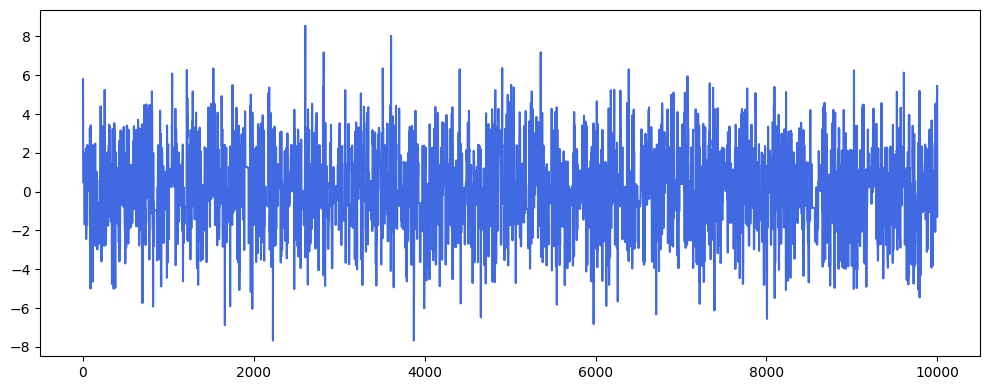

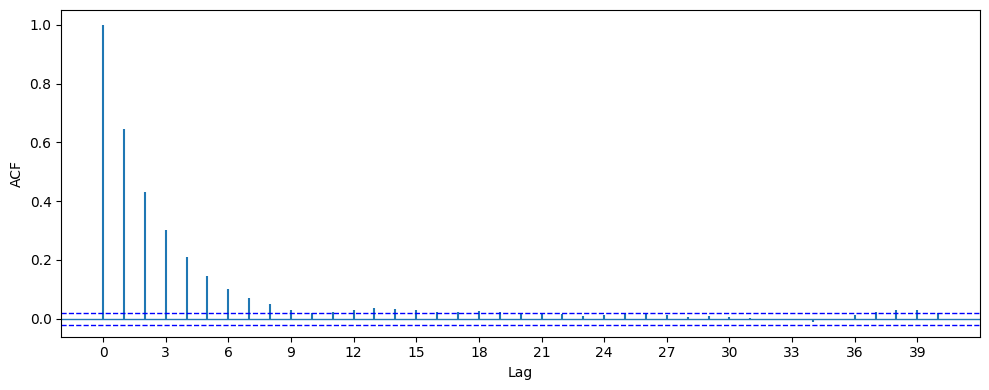

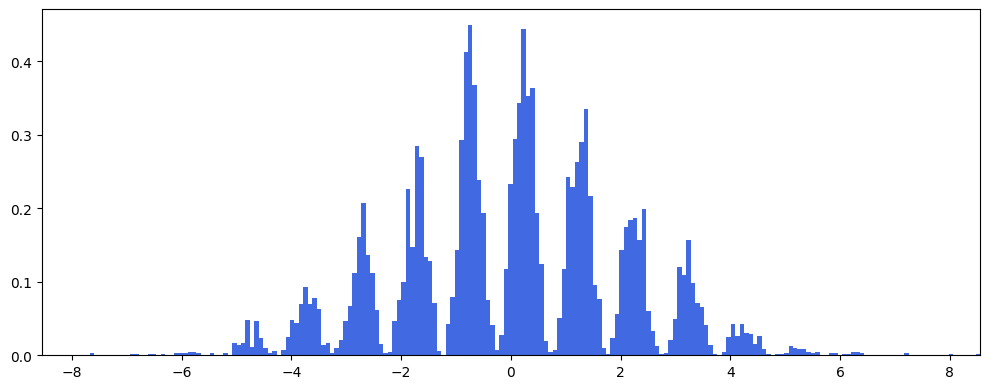

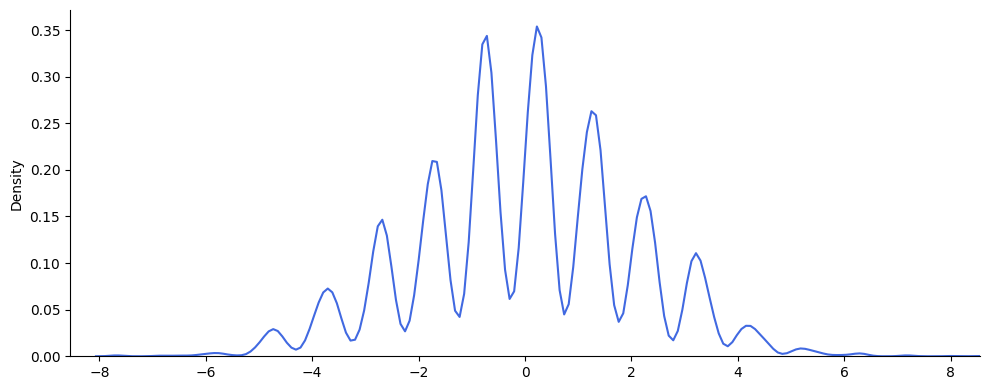

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(x, color='royalblue')
plt.tight_layout()
plt.show()

lags = 40
plt.figure(figsize=(10, 4))
acf_pacf_fig(x, both=False, lag = lags)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(x, bins=200,density=True, color='royalblue')
plt.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

g = sns.displot(x, kind='kde', bw_adjust=0.4, height=4, aspect=2.5, color='royalblue')
g.figure.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

# Random Walk

Set mu0 = 0 and tau0 = 2.

In [7]:
n = 10000
mu0 = 0
tau0 = 2

def target(x, mu=0, sigma=2, omega=2*np.pi):
    p_x = np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 + np.sin(omega * x))
    # p_x /= np.trapz(p_x, x)
    return p_x

y0 = np.random.uniform(0, 10)
x = []
x.append(y0)

accept_num = 0

for t in range(1, n):
    y = np.random.normal(x[t-1], tau0)
    q_y_given_x = norm.pdf(y, x[t-1], tau0)
    q_x_given_y = norm.pdf(x[t-1], y, tau0)
    log_alpha = min(0, np.log(target(y)) + np.log((q_x_given_y)) - np.log(target(x[t-1])) - np.log(q_y_given_x))

    u = np.random.uniform(0, 1)
    if np.log(u) <= log_alpha:
        x.append(y)
        accept_num += 1
    else:
        x.append(x[t-1])

accept_rate = accept_num / n

print('Acceptance rate:', accept_num, 'of', n, '=', str(accept_rate*100)+'%')

Acceptance rate: 4856 of 10000 = 48.559999999999995%


### Draw the Figure
1. The time series plots of $x_t$  
2. The ACF of $x_t$ (lags = 40)  
3. The histogram estimation of $x_1,\cdots,x_t$
4. The density estimation of $x_1,\cdots,x_t$

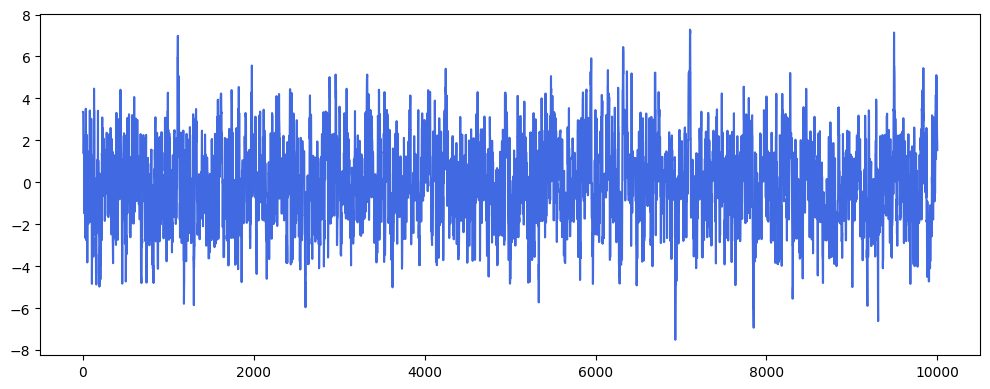

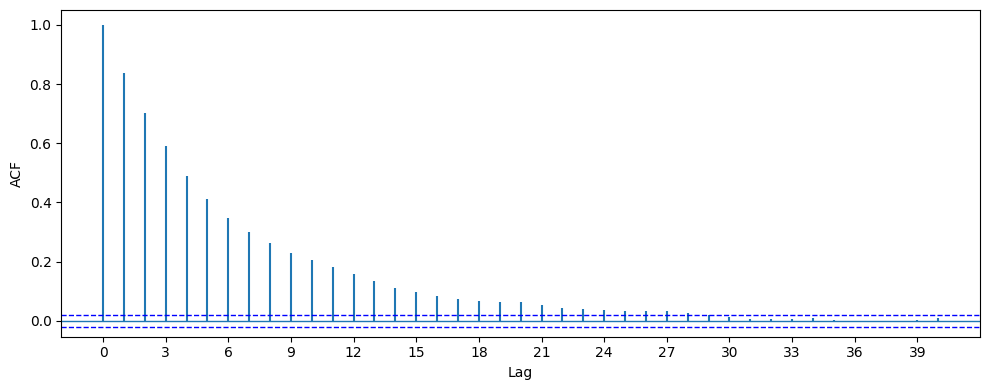

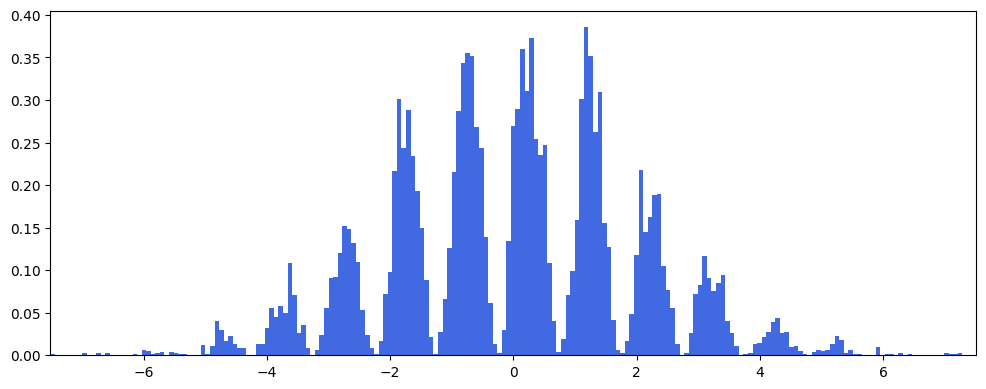

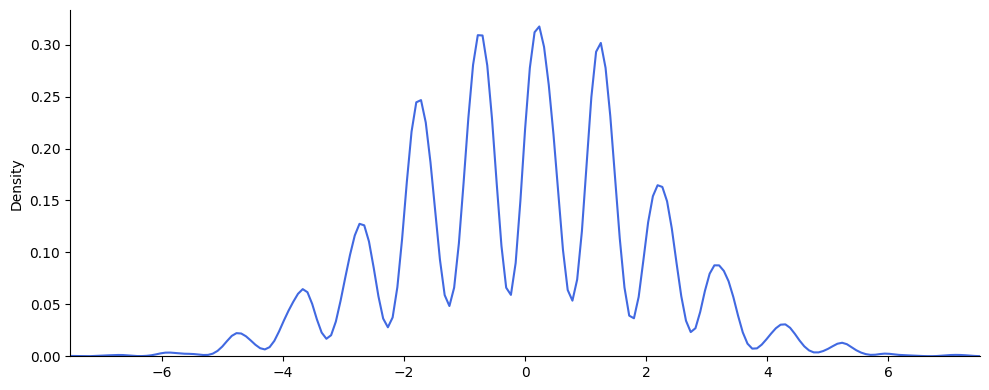

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(x, color='royalblue')
plt.tight_layout()
plt.show()

lags = 40
plt.figure(figsize=(10, 4))
acf_pacf_fig(x, both=False, lag = lags)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(x, bins=200,density=True, color='royalblue')
plt.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

g = sns.displot(x, kind='kde', bw_adjust=0.4, height=4, aspect=2.5, color='royalblue')
g.figure.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

### Robustness
For robustness, we set a bias mu and tau to test wheather independence MH can also fit.  
Here, we set mu0 = -1.2, tau0 = 0.4.

In [9]:
n = 10000
mu0 = -1.2
tau0 = 0.4

y0 = np.random.uniform(0, 10)
x = []
x.append(y0)

accept_num = 0

for t in range(1, n):
    y = np.random.normal(x[t-1], tau0)
    q_y_given_x = norm.pdf(y, x[t-1], tau0)
    q_x_given_y = norm.pdf(x[t-1], y, tau0)
    log_alpha = min(0, np.log(target(y)) + np.log((q_x_given_y)) - np.log(target(x[t-1])) - np.log(q_y_given_x))

    u = np.random.uniform(0, 1)
    if np.log(u) <= log_alpha:
        x.append(y)
        accept_num += 1
    else:
        x.append(x[t-1])

accept_rate = accept_num / n

print('Acceptance rate:', accept_num, 'of', n, '=', str(accept_rate*100)+'%')

Acceptance rate: 6040 of 10000 = 60.4%


### Draw the Figure
1. The time series plots of $x_t$  
2. The ACF of $x_t$ (lags = 40)  
3. The histogram estimation of $x_1,\cdots,x_t$
4. The density estimation of $x_1,\cdots,x_t$

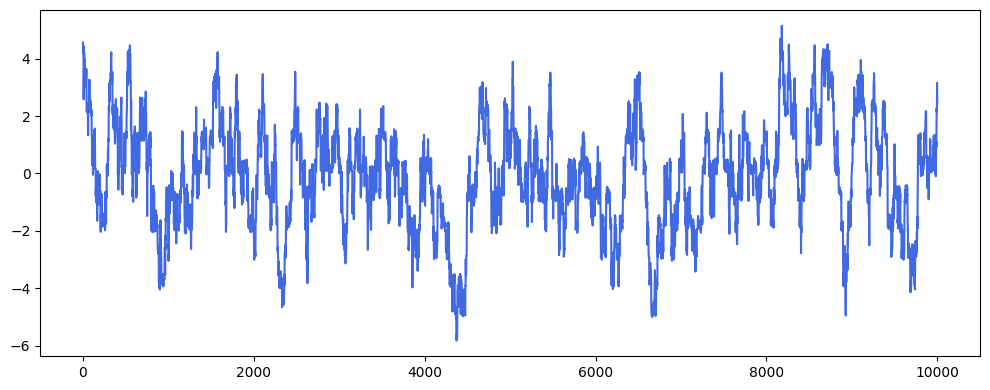

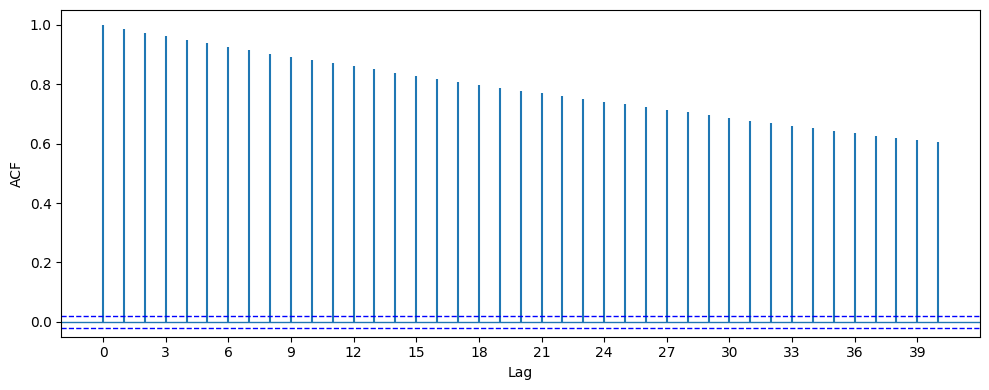

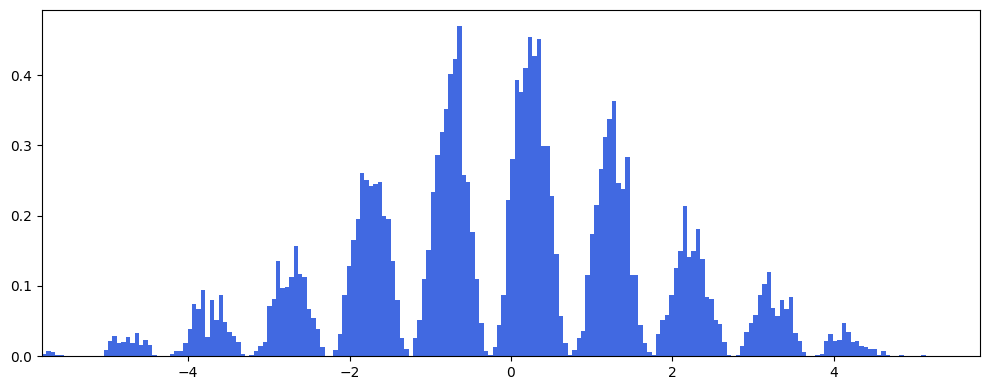

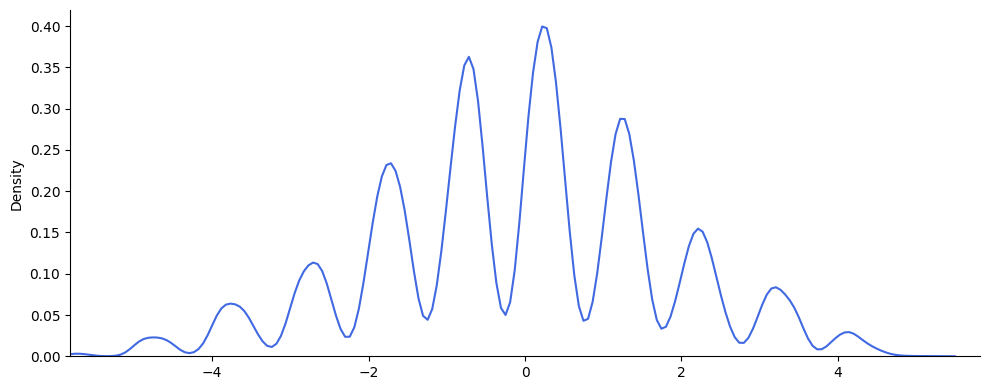

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(x, color='royalblue')
plt.tight_layout()
plt.show()

lags = 40
plt.figure(figsize=(10, 4))
acf_pacf_fig(x, both=False, lag = lags)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.hist(x, bins=200,density=True, color='royalblue')
plt.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

g = sns.displot(x, kind='kde', bw_adjust=0.4, height=4, aspect=2.5, color='royalblue')
g.figure.tight_layout()
plt.xlim([-max(np.abs(x)), max(np.abs(x))])
plt.show()

# Appendix - Probability Inverse Transform 

In [11]:
U = np.random.uniform(0, 1, 10000)
X = norm.ppf(U)

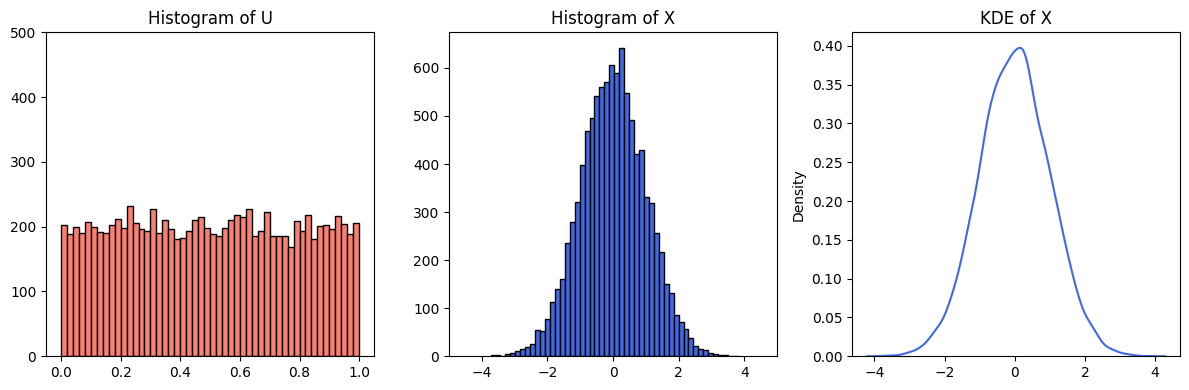

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(U, bins=50, color='salmon', edgecolor='black')
axes[0].set_ylim(0, 500)
axes[0].set_title('Histogram of U')

axes[1].hist(X, bins=50, color='royalblue', edgecolor='black')
axes[1].set_xlim(-5, 5)
axes[1].set_title('Histogram of X')

sns.kdeplot(X, bw_adjust=1, ax=axes[2], color='royalblue')
axes[2].set_title('KDE of X')

plt.tight_layout()
plt.show()
